In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [2]:
data=pd.read_csv("naive.csv")

In [3]:
X = data.drop(columns=["buy"])
y = data["buy"]

In [4]:
categorical_cols = [col for col in X.columns if X[col].dtype == "object"]
if categorical_cols:
    encoder = OneHotEncoder(sparse=False, handle_unknown="ignore")
    X_encoded = encoder.fit_transform(X[categorical_cols])
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))
    X = pd.concat([X.drop(columns=categorical_cols), X_encoded_df], axis=1)

C:\Users\dchar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [7]:
X=pd.DataFrame(X_scaled, columns=X.columns)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
 import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
df=pd.read_csv("naive.csv")
df.head(10)

,RID,age,income,student,credit,buy
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_aged,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle_aged,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


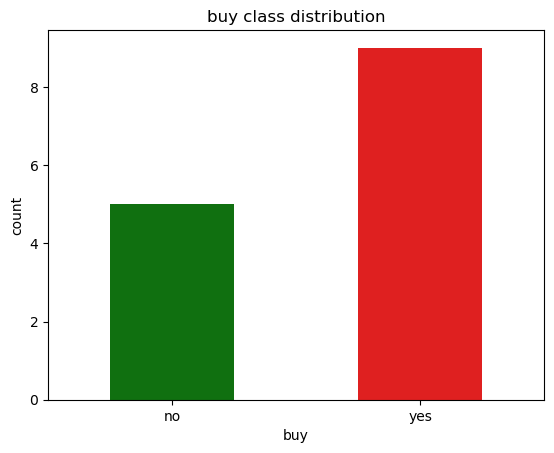

In [36]:
sns.countplot(data=df, x='buy', width=.5,palette=['green','red']) 
plt.title("buy class distribution")
plt.show()

In [15]:
data['age'] = pd.to_numeric(data['age'], errors='coerce')
print(data.dtypes)

RID          int64
age        float64
income      object
student     object
credit      object
buy         object
dtype: object


In [17]:
# Convert 'income' column to numeric, coercing errors to NaN
data['income'] = pd.to_numeric(data['income'], errors='coerce')

# Convert 'student' column to numeric, coercing errors to NaN
data['student'] = pd.to_numeric(data['student'], errors='coerce')


In [21]:
print(data.dtypes)


RID          int64
age        float64
income     float64
student    float64
credit      object
buy         object
dtype: object


In [23]:
data["credit"] = pd.to_numeric(data['credit'], errors='coerce')


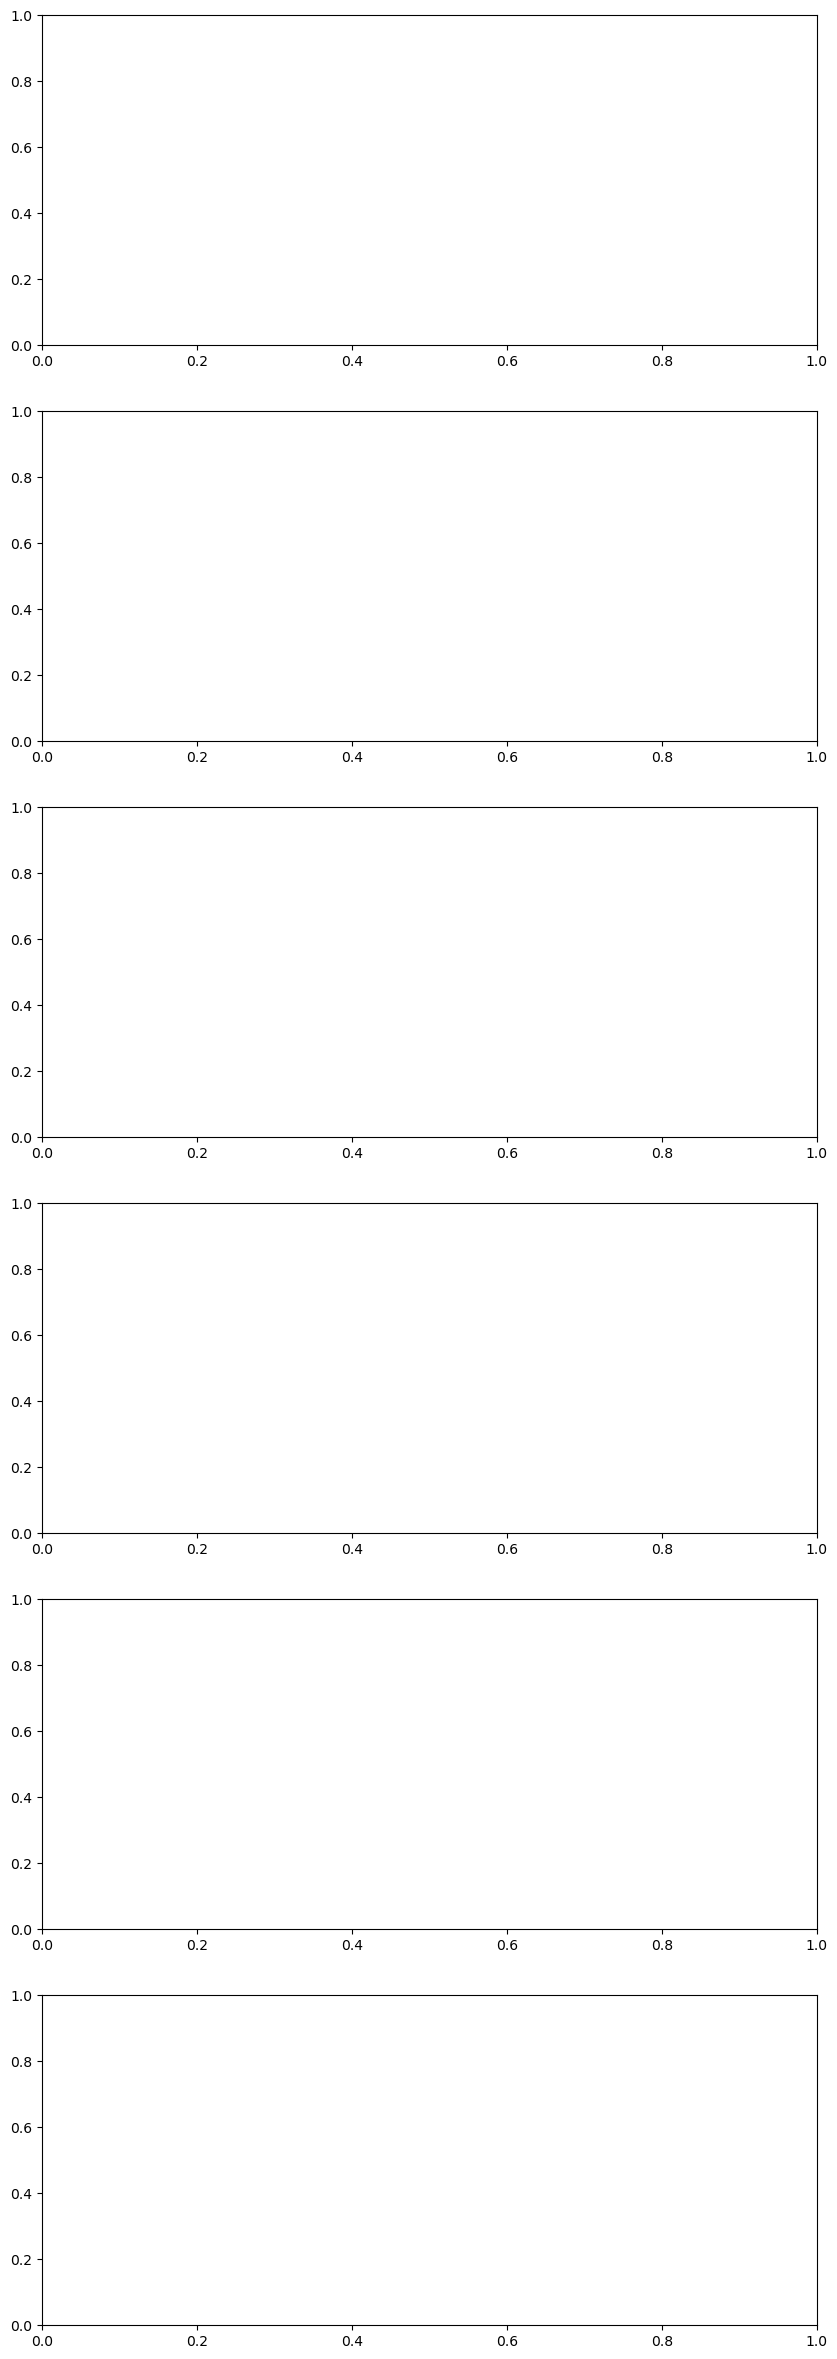

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(df.columns), figsize=(10, 30))


In [25]:
row = 0
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=col, ax=ax[row], kde=True, bins=5)
        ax[row].axvline(df[col].mean(), color='red')  # Plot vertical line for mean
        ax[row].set_title("Distribution for " + col)
        row += 1


In [27]:
plt.tight_layout()

plt.show()


<Figure size 640x480 with 0 Axes>

In [29]:
from sklearn.naive_bayes import GaussianNB

NBmodel=GaussianNB()

NBmodel.fit(X_train,y_train)

GaussianNB()

In [31]:
y_pred=NBmodel.predict(X_test)
y_pred

array(['no', 'yes', 'no'], dtype='<U3')

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def compute_evaluation_metric(y_actual, y_predicted):
    print(f"Accuracy score: {accuracy_score(y_actual, y_predicted)}")
    print(f"Confusion matrix:\n{confusion_matrix(y_actual, y_predicted)}")
    print(f"Classification report:\n{classification_report(y_actual, y_predicted)}")

compute_evaluation_metric(y_test, y_pred)


Accuracy score: 0.6666666666666666
Confusion matrix:
[[1 0]
 [1 1]]
Classification report:
              precision    recall  f1-score   support

          no       0.50      1.00      0.67         1
         yes       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

